# Gyak 14 Deep Reinforcement Learning

A gyakorlat célja a Deep Reinforcement Learning esetében alkalmazott tanítási framwork megismertetése a Markov Decision Process, valamint az OpenAI Gym környezetek bemutatásával.


A gyakorlat során egy alap Reinforcement Learning algoritmus kerül bemutatásra, a Q-learning.  Ezen algoritmus implementálás során a RL fő elemei is bemutatásra kerülenk, mint az episode, a reward, a state és az action.

A gyakorlat második részében a Reinforcement Learning-et ötvözzük a Deep Learninggel így megkapjuk a Deep Reinorcement Learninget, ahol egy mély neurális háló approximátor szerepet tölt be. A háló paramétereit úg tanítjuk, hogy egy ideális stratégiát tanuljanak meg a kitűzött feladat megoldásához. A DRL részben a Deep Q-learning Network (DQN) metódust ismerjük meg.

## Q learning - CliffWalking

In [1]:
# importok és a környezet betöltése (OpenAI gym környezetet használunk)
import gym
import matplotlib.pyplot as plt
from collections import defaultdict
import torch
env = gym.make("CliffWalking-v0")
n_state = env.observation_space.n
n_action = env.action_space.n
print(n_state)
print(n_action)

env.reset()

env.render()

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don

48
4


In [2]:
# manuális léptetés a környezetben

new_state, reward, is_done, info = env.step(1)
env.render()
print("reward: ",reward)
print("Are we there yet? ",is_done)

reward:  -100
Are we there yet?  False


In [3]:
new_state

36

In [4]:
# definiáljuk a policy/stratégia függvényt: eplsilon-greedy policy
def gen_epsilon_greedy_policy(n_action, epsilon):
    def policy_function(state, Q):
        probs = torch.ones(n_action) * epsilon / n_action

        #print(" \n Q [State % 2d]: " %(state), Q[state] )
        best_action = torch.argmax(Q[state]).item()
        #print("best_action ", best_action)
        #print("probs ", probs)
        probs[best_action] += 1.0 - epsilon
        #print("probs ", probs)
        action = torch.multinomial(probs, 1).item()
        #print("action \n ", action)
        return action
    return policy_function

In [5]:
# Definiáljuk a q függvényt, amely létrehoz nekünk egy listát az összes lehetséges
# szituációval (state) és minden szituációhoz hozzáreneli az összes lépés lehetőségét.
# A feladat, hogy maximalizáljuk adok statekre az actiont a tapasztalataink
# alapján, amit a jutalom (reward) definiál.
def q_learning(env, gamma, n_episode, alpha):
    n_action = env.action_space.n
    Q = defaultdict(lambda: torch.zeros(n_action))
    for episode in range(n_episode):
        state = env.reset()
        is_done = False
        #print("Episode====================== \n \n", episode)
        while not is_done:
            action = epsilon_greedy_policy(state, Q)
            next_state, reward, is_done, info = env.step(action)
            td_delta = reward + gamma * torch.max(Q[next_state]) - Q[state][action]
            #print("td_delta", td_delta)
            Q[state][action] += alpha * td_delta
            length_episode[episode] += 1
            total_reward_episode[episode] += reward
            if is_done:
                break
            state = next_state
    policy = {}
    for state, actions in Q.items():
        policy[state] = torch.argmax(actions).item()
    return Q, policy

In [10]:
# hyperparaméterek beaáálítása

# discount factor
gamma = 1


n_episode = 100

#learning rate
alpha = 0.1

#greedy treshold
epsilon = 0.1

length_episode = [0] * n_episode
total_reward_episode = [0] * n_episode

In [11]:
# policy inicializálás
epsilon_greedy_policy = gen_epsilon_greedy_policy(env.action_space.n, epsilon)

In [12]:
#tanítás
optimal_Q, optimal_policy = q_learning(env, gamma, n_episode,alpha)

In [13]:
# nézzük meg, hogyan alakult a Q(s,a) könyvtárunk.
optimal_Q

defaultdict(<function __main__.q_learning.<locals>.<lambda>()>,
            {36: tensor([ -9.2462, -76.1343,  -9.2524,  -9.2370]),
             24: tensor([-8.5100, -8.5188, -8.5769, -8.5456]),
             12: tensor([-8.0609, -8.0924, -8.0736, -8.0726]),
             0: tensor([-7.7815, -7.7928, -7.9063, -7.7880]),
             1: tensor([-7.5883, -7.6417, -7.6831, -7.5953]),
             2: tensor([-7.1878, -7.2369, -7.2319, -7.3156]),
             3: tensor([-6.7497, -6.7863, -6.8126, -6.8340]),
             4: tensor([-6.3915, -6.3488, -6.4243, -6.3575]),
             5: tensor([-5.8841, -5.8389, -5.9091, -5.9628]),
             6: tensor([-5.2958, -5.3247, -5.3546, -5.3499]),
             7: tensor([-4.7734, -4.7726, -4.8423, -4.8145]),
             8: tensor([-4.2827, -4.2337, -4.2124, -4.2453]),
             9: tensor([-3.6924, -3.6533, -3.6256, -3.7469]),
             10: tensor([-3.0974, -3.0913, -3.0508, -3.1715]),
             11: tensor([-2.6648, -2.5990, -2.6257, -2.5977]

In [14]:
# az optimális döntés pozíciónként.
optimal_policy

{36: 3,
 24: 0,
 12: 0,
 0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 1,
 5: 1,
 6: 0,
 7: 1,
 8: 2,
 9: 2,
 10: 2,
 11: 3,
 23: 2,
 22: 2,
 21: 0,
 20: 2,
 19: 1,
 18: 1,
 17: 1,
 16: 1,
 15: 0,
 35: 2,
 34: 1,
 33: 1,
 13: 1,
 14: 0,
 25: 3,
 26: 1,
 27: 1,
 28: 1,
 31: 1,
 30: 1,
 29: 1,
 32: 1,
 47: 0}

In [15]:
max(total_reward_episode)

-17

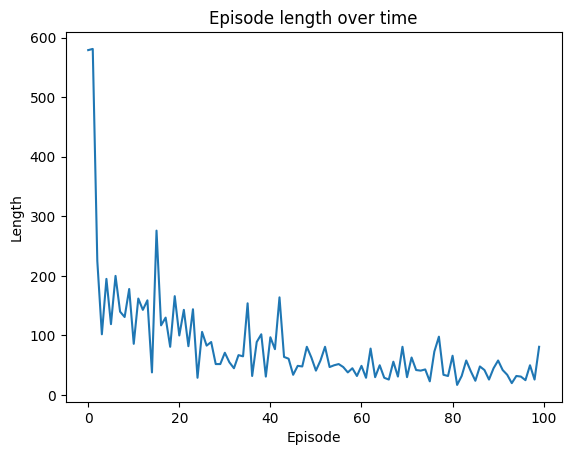

In [16]:

plt.plot(length_episode)
plt.title('Episode length over time')
plt.xlabel('Episode')
plt.ylabel('Length')
plt.show()

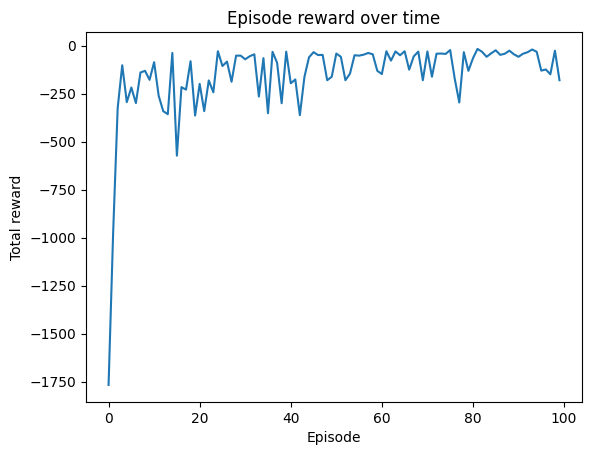

In [17]:
plt.plot(total_reward_episode)
plt.title('Episode reward over time')
plt.xlabel('Episode')
plt.ylabel('Total reward')
plt.show()

## Q-Learning Taxi

In [18]:
import gym
import matplotlib.pyplot as plt
from collections import defaultdict
import torch
env = gym.make('Taxi-v3')
n_state = env.observation_space.n
n_action = env.action_space.n
print(n_state)
print(n_action)

env.reset()

env.render()


500
6


In [19]:
new_state, reward, is_done, info = env.step(4)
env.render()
print("current state", new_state)
print("reward: ", reward)
print("Are we there yet? ", is_done)

current state 241
reward:  -10
Are we there yet?  False


In [20]:
reward

-10

In [21]:
n_episode = 3000
length_episode = [0] * n_episode
total_reward_episode = [0] * n_episode

In [22]:
gamma = 1
alpha = 0.4
epsilon = 0.1
epsilon_greedy_policy = gen_epsilon_greedy_policy(env.action_space.n, epsilon)

In [23]:
optimal_Q, optimal_policy = q_learning(env, gamma, n_episode,
alpha)

In [24]:
optimal_Q

defaultdict(<function __main__.q_learning.<locals>.<lambda>()>,
            {424: tensor([ -8.2639,   3.5989,  -8.4615,  -8.3994, -12.0000, -10.5600]),
             324: tensor([ -8.0865,   4.9975,  -7.7494,  -8.0000, -11.2161, -10.4104]),
             444: tensor([ -8.3747,   4.0981,  -8.4000,  -8.3480, -11.9614, -16.0530]),
             344: tensor([ -7.3240,   5.9989,  -7.6920,  -7.9579,  -6.4054, -11.1360]),
             244: tensor([ 3.0795,  1.2816,  7.0000,  2.2846, -4.7215, -8.0000]),
             264: tensor([-4.0210,  2.6621,  8.0000,  5.0051, -4.1600, -3.2960]),
             364: tensor([ -7.0481,  -1.3552,   6.9972,  -7.0577,  -8.0000, -11.2000]),
             464: tensor([ -7.4400,   5.2235,  -7.3801,  -7.2000, -12.0856,  -8.0000]),
             164: tensor([-6.0352, -6.2016,  8.9680, -6.1877, -6.4697, -7.3600]),
             284: tensor([ 4.1495,  9.0000,  6.8802, -1.0129, -2.2478, -5.6640]),
             384: tensor([ -3.4268,   8.0000,  -6.9241,  -1.8434, -11.4097,  -7.

In [25]:
# nézzük meg, hogyan alakult a Q(s,a) könyvtárunk.
optimal_Q

defaultdict(<function __main__.q_learning.<locals>.<lambda>()>,
            {424: tensor([ -8.2639,   3.5989,  -8.4615,  -8.3994, -12.0000, -10.5600]),
             324: tensor([ -8.0865,   4.9975,  -7.7494,  -8.0000, -11.2161, -10.4104]),
             444: tensor([ -8.3747,   4.0981,  -8.4000,  -8.3480, -11.9614, -16.0530]),
             344: tensor([ -7.3240,   5.9989,  -7.6920,  -7.9579,  -6.4054, -11.1360]),
             244: tensor([ 3.0795,  1.2816,  7.0000,  2.2846, -4.7215, -8.0000]),
             264: tensor([-4.0210,  2.6621,  8.0000,  5.0051, -4.1600, -3.2960]),
             364: tensor([ -7.0481,  -1.3552,   6.9972,  -7.0577,  -8.0000, -11.2000]),
             464: tensor([ -7.4400,   5.2235,  -7.3801,  -7.2000, -12.0856,  -8.0000]),
             164: tensor([-6.0352, -6.2016,  8.9680, -6.1877, -6.4697, -7.3600]),
             284: tensor([ 4.1495,  9.0000,  6.8802, -1.0129, -2.2478, -5.6640]),
             384: tensor([ -3.4268,   8.0000,  -6.9241,  -1.8434, -11.4097,  -7.

In [26]:
# az optimális döntés pozíciónként.
optimal_policy

{424: 1,
 324: 1,
 444: 1,
 344: 1,
 244: 2,
 264: 2,
 364: 2,
 464: 1,
 164: 2,
 284: 1,
 384: 1,
 484: 1,
 184: 1,
 224: 2,
 124: 0,
 144: 1,
 204: 2,
 304: 1,
 404: 1,
 104: 0,
 24: 0,
 4: 0,
 44: 2,
 64: 2,
 84: 4,
 121: 3,
 221: 1,
 321: 1,
 421: 1,
 21: 3,
 101: 1,
 201: 1,
 301: 1,
 401: 1,
 241: 3,
 341: 1,
 441: 3,
 141: 0,
 261: 3,
 361: 1,
 461: 1,
 161: 0,
 281: 3,
 381: 3,
 481: 1,
 181: 3,
 1: 4,
 17: 0,
 117: 0,
 217: 2,
 317: 1,
 417: 1,
 37: 0,
 137: 0,
 237: 2,
 337: 2,
 437: 0,
 41: 0,
 61: 0,
 81: 0,
 28: 0,
 128: 0,
 228: 3,
 328: 1,
 428: 1,
 8: 0,
 108: 0,
 208: 0,
 308: 0,
 408: 4,
 248: 3,
 148: 0,
 348: 3,
 448: 3,
 268: 3,
 368: 1,
 468: 1,
 168: 3,
 288: 3,
 388: 1,
 488: 3,
 188: 3,
 416: 1,
 316: 1,
 216: 1,
 48: 0,
 68: 0,
 88: 3,
 169: 0,
 269: 3,
 369: 1,
 469: 1,
 69: 0,
 49: 0,
 149: 0,
 249: 3,
 349: 3,
 449: 1,
 189: 0,
 289: 3,
 389: 1,
 489: 1,
 89: 3,
 229: 3,
 329: 1,
 429: 1,
 129: 0,
 209: 0,
 309: 0,
 409: 4,
 109: 0,
 29: 0,
 9: 0,
 43: 0,
 

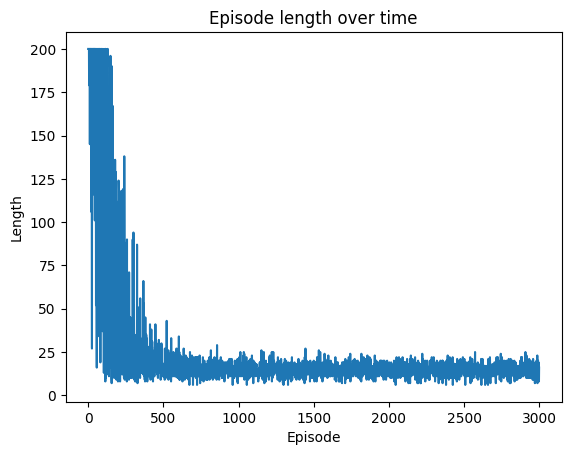

In [27]:
plt.plot(length_episode)
plt.title('Episode length over time')

plt.xlabel('Episode')
plt.ylabel('Length')
plt.show()

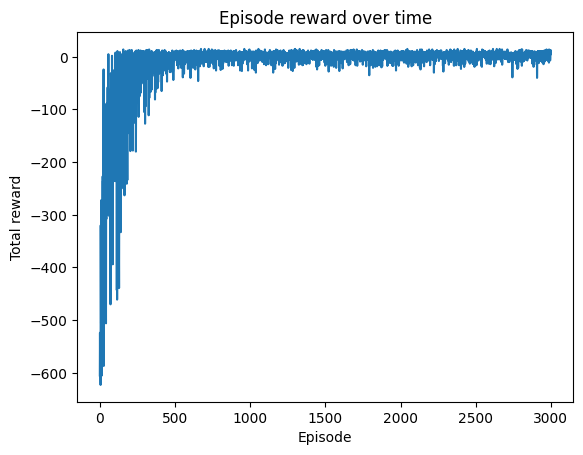

In [28]:
plt.plot(total_reward_episode)
plt.title('Episode reward over time')
plt.xlabel('Episode')
plt.ylabel('Total reward')
plt.show()

In [29]:
max(total_reward_episode)

15

## Sarsa CliffWalking & Taxi

In [30]:
env = gym.make("CliffWalking-v0")
# env = gym.make('Taxi-v3')

n_episode = 1000
length_episode = [0] * n_episode
total_reward_episode = [0] * n_episode

In [31]:
gamma = 1
alpha = 0.4
epsilon = 0.01

In [32]:
def sarsa(env, gamma, n_episode, alpha):

    n_action = env.action_space.n
    Q = defaultdict(lambda: torch.zeros(n_action))
    for episode in range(n_episode):
        state = env.reset()
        is_done = False
        action = epsilon_greedy_policy(state, Q)
        while not is_done:
            next_state, reward, is_done, info = env.step(action)
            next_action = epsilon_greedy_policy(next_state, Q)
            td_delta = reward + gamma * Q[next_state][next_action] - Q[state][action]
            Q[state][action] += alpha * td_delta
            length_episode[episode] += 1
            total_reward_episode[episode] += reward
            if is_done:
                break
            state = next_state
            action = next_action
    policy = {}

    for state, actions in Q.items():
        policy[state] = torch.argmax(actions).item()
    return Q, policy

In [33]:
gamma = 1
alpha = 0.4
epsilon = 0.1

In [34]:
epsilon_greedy_policy = gen_epsilon_greedy_policy(env.action_space.n, epsilon)

In [35]:
optimal_Q, optimal_policy = sarsa(env, gamma, n_episode, alpha)

In [36]:
optimal_Q

defaultdict(<function __main__.sarsa.<locals>.<lambda>()>,
            {36: tensor([ -18.6937, -119.5142,  -33.6735,  -31.1008]),
             24: tensor([-17.8103, -38.4151, -25.6053, -19.6315]),
             12: tensor([-16.8122, -19.9854, -20.7413, -18.4717]),
             0: tensor([-17.3542, -16.0140, -18.8711, -18.2588]),
             1: tensor([-16.5592, -15.0392, -17.0857, -17.7254]),
             2: tensor([-15.2603, -13.3345, -16.3218, -16.8142]),
             3: tensor([-13.7400, -11.9508, -14.3168, -15.9412]),
             4: tensor([-12.6798, -10.6727, -13.3248, -14.4933]),
             5: tensor([-12.1558,  -9.5251, -12.1688, -13.7009]),
             6: tensor([-10.9339,  -8.6401, -11.3897, -12.0803]),
             7: tensor([ -9.9242,  -7.9014, -10.2700, -11.2803]),
             8: tensor([-8.1631, -6.6282, -8.8976, -9.8370]),
             9: tensor([-7.5106, -5.2235, -7.4593, -8.4931]),
             10: tensor([-6.6111, -4.1159, -6.0244, -7.9011]),
             11: tens

In [37]:
optimal_policy

{36: 0,
 24: 0,
 12: 0,
 0: 1,
 1: 1,
 2: 1,
 3: 1,
 4: 1,
 5: 1,
 6: 1,
 7: 1,
 8: 1,
 9: 1,
 10: 1,
 11: 2,
 23: 2,
 22: 1,
 21: 0,
 19: 0,
 18: 0,
 17: 1,
 16: 1,
 15: 0,
 14: 1,
 13: 0,
 20: 0,
 35: 2,
 34: 1,
 33: 0,
 32: 0,
 31: 3,
 47: 0,
 25: 1,
 26: 1,
 28: 0,
 30: 0,
 29: 0,
 27: 1}

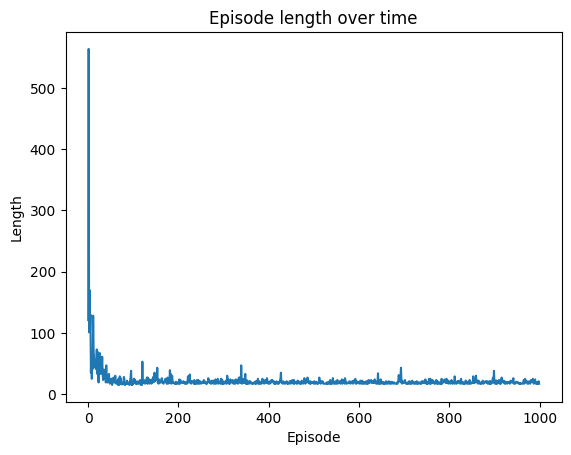

In [38]:
plt.plot(length_episode)
plt.title('Episode length over time')
plt.xlabel('Episode')
plt.ylabel('Length')
plt.show()

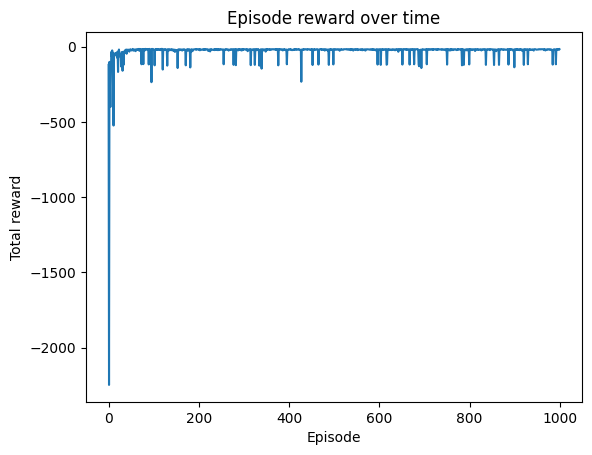

In [39]:
plt.plot(total_reward_episode)
plt.title('Episode reward over time')
plt.xlabel('Episode')
plt.ylabel('Total reward')
plt.show()

## DQN

In [40]:
import gym
import torch
from torch.autograd import Variable
import random
import matplotlib.pyplot as plt
from IPython import display
torch.manual_seed(14)
from collections import deque
%matplotlib inline
env = gym.envs.make("MountainCar-v0")

In [41]:
def gen_epsilon_greedy_policy(estimator, epsilon, n_action):
    def policy_function(state):
        if random.random() < epsilon:
            return random.randint(0, n_action - 1)
        else:
            q_values = estimator.predict(state)
            return torch.argmax(q_values).item()
    return policy_function

In [42]:
def q_learning(env, estimator, n_episode, gamma=1.0, epsilon=0.1, epsilon_decay=.99):
    """
    Deep Q-Learning using DQN
    @param env: Gym environment
    @param estimator: Estimator object
    @param n_episode: number of episodes
    @param gamma: the discount factor
    @param epsilon: parameter for epsilon_greedy
    @param epsilon_decay: epsilon decreasing factor
    """
    fig = plt.figure()
    for episode in range(n_episode):
        policy = gen_epsilon_greedy_policy(estimator, epsilon, n_action)
        state = env.reset()
        is_done = False
        while not is_done:
            action = policy(state)
            next_state, reward, is_done, _ = env.step(action)
            total_reward_episode[episode] += reward
            modified_reward = next_state[0] + 0.5
            if next_state[0] >= 0.5:
                modified_reward += 100
            elif next_state[0] >= 0.25:
                modified_reward += 20
            elif next_state[0] >= 0.1:
                modified_reward += 15
            elif next_state[0] >= 0:
                modified_reward += 10

            q_values = estimator.predict(state).tolist()

            if is_done:
                q_values[action] = modified_reward
                estimator.update(state, q_values)
                break

            q_values_next = estimator.predict(next_state)
            q_values[action] = modified_reward + gamma * torch.max(q_values_next).item()

            estimator.update(state, q_values)
            state = next_state

        if episode % 50 == 0:
            display.clear_output(wait=True)
            display.display(plt.clf())
            plt.plot(total_reward_episode)
            plt.title('Episode reward over time')
            plt.xlabel('Episode')
            plt.ylabel('Total reward')
            plt.show()
            print('Episode: {}, total reward: {}, epsilon:{}'.format(episode, total_reward_episode[episode], epsilon))
        epsilon = max(epsilon * epsilon_decay, 0.01)

In [43]:
class DQN():
    def __init__(self, n_state, n_action, n_hidden=50, lr=0.05):
        self.criterion = torch.nn.MSELoss()
        self.model = torch.nn.Sequential(
            torch.nn.Linear(n_state, n_hidden),
            torch.nn.ReLU(),
            torch.nn.Linear(n_hidden, n_action))
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr)

    def update(self, s, y):
        """
        Update the weights of the DQN given a training sample
        @param s: state
        @param y: target value
        """
        y_pred = self.model(torch.Tensor(s))
        loss = self.criterion(y_pred, Variable(torch.Tensor(y)))
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

    def predict(self, s):
        """
         Compute the Q values of the state for allactions using the learning model
        @param s: input state
        @return: Q values of the state for all actions
        """
        with torch.no_grad():
            return self.model(torch.Tensor(s))

In [44]:
n_state = env.observation_space.shape[0]
n_action = env.action_space.n
n_hidden = 500
lr = 0.001
dqn = DQN(n_state, n_action, n_hidden, lr)

None

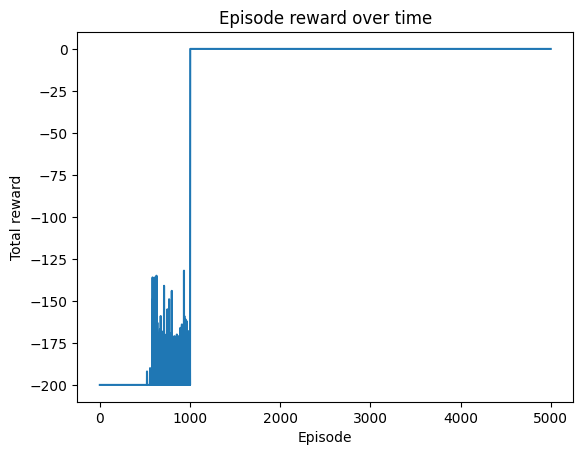

Episode: 1000, total reward: -200.0, epsilon:0.01


KeyboardInterrupt: ignored

In [45]:
n_episode = 5000
total_reward_episode = [0] * n_episode
q_learning(env, dqn, n_episode, gamma=.9, epsilon=1)

In [ ]:
plt.plot(total_reward_episode)
plt.title('Episode reward over time')
plt.xlabel('Episode')
plt.ylabel('Total reward')
plt.show()

## Környezet megjelenítése videorögzítés által

- Mivel a colabban nem lehetséges a gym környezetket valós időben futtatni így a videofájlba generálunk epizódokat.

In [ ]:
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1

In [ ]:
!apt-get update > /dev/null 2>&1
!apt-get install cmake > /dev/null 2>&1
!pip install --upgrade setuptools 2>&1
!pip install ez_setup > /dev/null 2>&1
!pip install gym[atari] > /dev/null 2>&1

In [ ]:
import gym
from gym import logger as gymlogger
from gym.wrappers import Monitor
gymlogger.set_level(40) #error only
import tensorflow as tf
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import glob
import io
import base64
from IPython.display import HTML

from IPython import display as ipythondisplay

In [ ]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

In [ ]:
"""
Utility functions to enable video recording of gym environment and displaying it
To enable video, just do "env = wrap_env(env)""
"""

def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else:
    print("Could not find video")


def wrap_env(env):
  env = Monitor(env, './video', force=True)
  return env

In [ ]:
env = wrap_env(gym.envs.make("MountainCar-v0"))

In [ ]:
observation = env.reset()

while True:

    env.render()

    #your agent goes here

    q_values = dqn.predict(observation)
    action = torch.argmax(q_values).item()
    #action = env.action_space.sample()

    observation, reward, done, info = env.step(action)


    if done:
      break;

env.close()
show_video()